In [1]:
# LA Parks & Rec

In [2]:
## Introduction
### I'd like to plot out the distribution of parks in the city of LA based on data from the city's site.
### The data includes the coordinates of the parks, as well as the district, name of the park, and area of the park by acre.
### I will try to clean up the data to get rid of some of the extraneous information, such as the official names of the parks.

In [3]:
# I'm going to import geopandas so that it can read the shapefile of park data that I've downloaded from the city source
import geopandas as gpd

In [5]:
# now i'm just going to check what it looks like when I input gpd as a code cell now that I've imported it
gpd

<module 'geopandas' from '/opt/conda/lib/python3.9/site-packages/geopandas/__init__.py'>

In [10]:
# This is showing geopandas as from the library that I've imported it from
# Now I'm going to have it read the parks data that I downloaded
laparks = gpd.read_file('Recreation and Parks Information.zip')
# I have to be sure to keep it in quotes so that it is read correctly

In [11]:
# now I'm going to check how big my dataset is, by checking the shape
laparks.shape

(561, 14)

In [12]:
# this shows me that there are 561 rows and 14 columns of data in the set I downloaded

In [29]:
# now I'll check the information that the data contains, which will tell me about all the columns that are in the data, as well as the first and last few rows of data
laparks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    561 non-null    float64 
 1   name_alpha  561 non-null    object  
 2   area_acres  561 non-null    float64 
 3   park_id     561 non-null    object  
 4   cd_real     561 non-null    object  
 5   name_publi  330 non-null    object  
 6   address     561 non-null    object  
 7   region      561 non-null    object  
 8   name        561 non-null    object  
 9   issubpark   561 non-null    object  
 10  park_class  561 non-null    object  
 11  shape_leng  561 non-null    float64 
 12  shape_area  561 non-null    float64 
 13  geometry    561 non-null    geometry
dtypes: float64(4), geometry(1), object(9)
memory usage: 61.5+ KB


In [30]:
# this is helpful for showing me what information is included in the set, but it's hard to read
# now I will check the first few rows of data that will present it in a more readable table
laparks.head()

,objectid,name_alpha,area_acres,park_id,cd_real,name_publi,address,region,name,issubpark,park_class,shape_leng,shape_area,geometry
0,1.0,ROBERT F KENNEDY PARK (LAUSD) JUA,0.149252,1056,10,Kennedy (Robert F) Inspiration Memorial Park (...,"3400 W Wilshire Blvd, LA 90010",M,Robert F Kennedy Inspiration Memorial Park,N,N,641.470545,6501.374880,"POLYGON ((-118.29796 34.06162, -118.29697 34.0..."
1,2.0,SYCAMORE GROVE PARK,15.873851,736,01,Sycamore Grove Park,"4702 N Figueroa St, LA 90042",M,Sycamore Grove Park,N,C,6227.399190,691462.199493,"POLYGON ((-118.20110 34.10134, -118.20110 34.1..."
2,3.0,SAN PEDRO WELCOME PARK,0.399500,328,15,Formerly Welcome Park,"451 N Gaffey St, San Pedro 90731",P,San Pedro Welcome Park,N,N,560.372862,17402.157978,"POLYGON ((-118.29286 33.74600, -118.29286 33.7..."
3,4.0,COUNTRY CLUB PARK HERITAGE PLAZA,0.083743,1045,10,AKA Wilton Place Park,"1015 S Wilton Pl, LA 90018",M,Country Club Heritage Park,N,N,287.523337,3647.848601,"POLYGON ((-118.31504 34.05232, -118.31497 34.0..."
4,5.0,WATTS CULTURAL CRESCENT,2.956700,1046,15,AKA Watts Towers Cultural Cresent,"1780 E Santa Ana Blvd, LA 90002",P,Watts Cultural Crescent,N,N,2852.110333,128793.355722,"POLYGON ((-118.24221 33.93945, -118.24225 33.9..."


In [31]:
# these are the first 5 parks that are included in the data, now I will look at the last 5
laparks.tail()

,objectid,name_alpha,area_acres,park_id,cd_real,name_publi,address,region,name,issubpark,park_class,shape_leng,shape_area,geometry
556,558.0,LOS ANGELES RIVER GREENWAY - LAUREL CANYON TO ...,3.038460,1137,02,None,"12305 W Valleyheart Dr South, Studio City 91604",V,Los Angeles River Greenway,Y,R,6045.514239,132354.800710,"POLYGON ((-118.39719 34.14454, -118.39721 34.1..."
557,568.0,SOUTH PALOS VERDES STREET PARK,0.405940,1115,15,"South Palos Verdes Street Park, Community Garden","200-220 S Palos Verdes St, 90731",P,South Palos Verdes Street Park,N,N,548.042636,17682.691812,"POLYGON ((-118.28107 33.74228, -118.28090 33.7..."
558,579.0,SUNNYNOOK RIVER PARK,0.956963,1093,04,Sunnynook River Park,"2901 N Glendale Blvd, LA 90039",M,Sunnynook River Park,Y,R,1777.670711,41685.151706,"POLYGON ((-118.26586 34.11353, -118.26597 34.1..."
559,580.0,LAURELGROVE PEDESTRIAN BRIDGE,0.030827,1138,02,LOS ANGELES RIVER GREENWAY - LAURELGROVE PEDES...,"12305 W Valleyheart Dr South, Studio City 91604",V,Los Angeles River Greenway,Y,R,332.093587,1342.839129,"POLYGON ((-118.40091 34.14380, -118.40091 34.1..."
560,582.0,LOS ANGELES RIVER GREENWAY / ELYSIAN VALLEY BI...,4.823865,1116,13,Los Angeles River Greenway / Elysian Valley Bi...,Los Angeles River West bank from N Fletcher Dr...,M,Los Angeles River Greenway / Elysian Valley Bi...,Y,R,27587.841522,210126.738804,"MULTIPOLYGON (((-118.24294 34.10337, -118.2429..."


<AxesSubplot:>

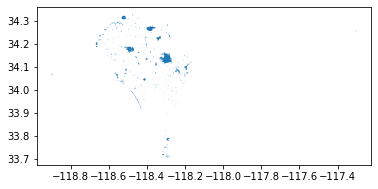

In [32]:
# there are a lot more rows in between these ones, but at least now I can see how they are listed out more clearly
# because I can see that the coordinates are here for each park, I might as well see how they are all plotted out
laparks.plot()

In [33]:
# this looks like the general shape of LA city, so I know that the data I've plotted are solid visual representations of LA's parks
# I want to get some samples of the data to see what council district I notice coming up the most
laparks.sample(5)

,objectid,name_alpha,area_acres,park_id,cd_real,name_publi,address,region,name,issubpark,park_class,shape_leng,shape_area,geometry
366,510.0,MT LEE PARK,8.495345,1075,04,"Mount Lee Park, Griffith Park Region","Griffith Park Region - 3801 W Mt Lee Drive, LA...",G,Mt Lee Park,Y,R,3241.876847,3.700557e+05,"POLYGON ((-118.32259 34.13632, -118.31857 34.1..."
381,511.0,"MARTIN LUTHER KING, JR PARK",6.531805,365,08,Martin Luther King Jr. Therapeutic Recreation ...,"3934 S Western Ave, LA 90062",P,Martin Luther King Jr Park,N,C,2156.535606,2.845243e+05,"POLYGON ((-118.30726 34.01288, -118.30769 34.0..."
434,408.0,VILLA CABRINI PARK,17.070791,354,02,None,"9401 W Cabrini Dr, Burbank 91504",V,Villa Cabrini Park,Y,R,3662.894521,7.436007e+05,"POLYGON ((-118.33835 34.21493, -118.33905 34.2..."
167,154.0,LIBBIT PARK,24.514866,160,05,"Encino Baseball Complex, Encino Baseball Conce...","5101 N Libbit Ave and 5120 N Hayvenhurst Ave, ...",V,Libbit Park & Encino Baseball Complex,Y,R,5434.545554,1.067863e+06,"POLYGON ((-118.48813 34.16046, -118.48813 34.1..."
3,4.0,COUNTRY CLUB PARK HERITAGE PLAZA,0.083743,1045,10,AKA Wilton Place Park,"1015 S Wilton Pl, LA 90018",M,Country Club Heritage Park,N,N,287.523337,3.647849e+03,"POLYGON ((-118.31504 34.05232, -118.31497 34.0..."


In [19]:
# this shows me a random sample of 5 rows of data that changes every time I input it
# it looks like a good way to organize the data would be by council district, so I am going to see how many parks each district has

In [34]:
# the district data is labeled as 'cd_real' so that is how I will write it in the command
laparks['cd_real'].value_counts()

14    54
11    50
01    49
15    49
12    47
04    41
07    38
13    35
09    34
02    33
06    28
05    28
08    26
10    24
03    21
99     4
Name: cd_real, dtype: int64

In [21]:
# This shows me a list of how many parks are in each council district, with 14 having the most parks, at 54
# That doesn't mean that district 14 has the most area of parks, though
# also, I'm noticing that there is a council district 99 in this list, which is odd
# I wonder if it's a typo for District 9, so maybe I'll plot the points for District 09 and 99 to see if they're around the same area
# I also have to declare cd_real as a new variable, because I haven't saved it yet

In [35]:
cd_real = laparks['cd_real']

In [36]:
cd_real

0      10
1      01
2      15
3      10
4      15
       ..
556    02
557    15
558    04
559    02
560    13
Name: cd_real, Length: 561, dtype: object

In [40]:
# now this shows me which district number is in each row 
# now I just want to see the table including information from District 9 +99 
laparks[['objectid','name_alpha', 'cd_real', 'shape_leng', 'shape_area', 'geometry']]

,objectid,name_alpha,cd_real,shape_leng,shape_area,geometry
0,1.0,ROBERT F KENNEDY PARK (LAUSD) JUA,10,641.470545,6501.374880,"POLYGON ((-118.29796 34.06162, -118.29697 34.0..."
1,2.0,SYCAMORE GROVE PARK,01,6227.399190,691462.199493,"POLYGON ((-118.20110 34.10134, -118.20110 34.1..."
2,3.0,SAN PEDRO WELCOME PARK,15,560.372862,17402.157978,"POLYGON ((-118.29286 33.74600, -118.29286 33.7..."
3,4.0,COUNTRY CLUB PARK HERITAGE PLAZA,10,287.523337,3647.848601,"POLYGON ((-118.31504 34.05232, -118.31497 34.0..."
4,5.0,WATTS CULTURAL CRESCENT,15,2852.110333,128793.355722,"POLYGON ((-118.24221 33.93945, -118.24225 33.9..."
...,...,...,...,...,...,...
556,558.0,LOS ANGELES RIVER GREENWAY - LAUREL CANYON TO ...,02,6045.514239,132354.800710,"POLYGON ((-118.39719 34.14454, -118.39721 34.1..."
557,568.0,SOUTH PALOS VERDES STREET PARK,15,548.042636,17682.691812,"POLYGON ((-118.28107 33.74228, -118.28090 33.7..."
558,579.0,SUNNYNOOK RIVER PARK,04,1777.670711,41685.151706,"POLYGON ((-118.26586 34.11353, -118.26597 34.1..."
559,580.0,LAURELGROVE PEDESTRIAN BRIDGE,02,332.093587,1342.839129,"POLYGON ((-118.40091 34.14380, -118.40091 34.1..."


In [41]:
# this shows me a trimmed version with mostly the information I care about right now
# now i want to save this as a new variable so it's easier to use
desired_columns = ['objectid','name_alpha', 'cd_real', 'shape_leng', 'shape_area', 'geometry']

In [42]:
laparks[desired_columns]

,objectid,name_alpha,cd_real,shape_leng,shape_area,geometry
0,1.0,ROBERT F KENNEDY PARK (LAUSD) JUA,10,641.470545,6501.374880,"POLYGON ((-118.29796 34.06162, -118.29697 34.0..."
1,2.0,SYCAMORE GROVE PARK,01,6227.399190,691462.199493,"POLYGON ((-118.20110 34.10134, -118.20110 34.1..."
2,3.0,SAN PEDRO WELCOME PARK,15,560.372862,17402.157978,"POLYGON ((-118.29286 33.74600, -118.29286 33.7..."
3,4.0,COUNTRY CLUB PARK HERITAGE PLAZA,10,287.523337,3647.848601,"POLYGON ((-118.31504 34.05232, -118.31497 34.0..."
4,5.0,WATTS CULTURAL CRESCENT,15,2852.110333,128793.355722,"POLYGON ((-118.24221 33.93945, -118.24225 33.9..."
...,...,...,...,...,...,...
556,558.0,LOS ANGELES RIVER GREENWAY - LAUREL CANYON TO ...,02,6045.514239,132354.800710,"POLYGON ((-118.39719 34.14454, -118.39721 34.1..."
557,568.0,SOUTH PALOS VERDES STREET PARK,15,548.042636,17682.691812,"POLYGON ((-118.28107 33.74228, -118.28090 33.7..."
558,579.0,SUNNYNOOK RIVER PARK,04,1777.670711,41685.151706,"POLYGON ((-118.26586 34.11353, -118.26597 34.1..."
559,580.0,LAURELGROVE PEDESTRIAN BRIDGE,02,332.093587,1342.839129,"POLYGON ((-118.40091 34.14380, -118.40091 34.1..."


In [44]:
# this was an easier way for me to save the new variable, and now it comes up easily
laparks_trimmed = laparks[desired_columns].copy()
laparks_trimmed

,objectid,name_alpha,cd_real,shape_leng,shape_area,geometry
0,1.0,ROBERT F KENNEDY PARK (LAUSD) JUA,10,641.470545,6501.374880,"POLYGON ((-118.29796 34.06162, -118.29697 34.0..."
1,2.0,SYCAMORE GROVE PARK,01,6227.399190,691462.199493,"POLYGON ((-118.20110 34.10134, -118.20110 34.1..."
2,3.0,SAN PEDRO WELCOME PARK,15,560.372862,17402.157978,"POLYGON ((-118.29286 33.74600, -118.29286 33.7..."
3,4.0,COUNTRY CLUB PARK HERITAGE PLAZA,10,287.523337,3647.848601,"POLYGON ((-118.31504 34.05232, -118.31497 34.0..."
4,5.0,WATTS CULTURAL CRESCENT,15,2852.110333,128793.355722,"POLYGON ((-118.24221 33.93945, -118.24225 33.9..."
...,...,...,...,...,...,...
556,558.0,LOS ANGELES RIVER GREENWAY - LAUREL CANYON TO ...,02,6045.514239,132354.800710,"POLYGON ((-118.39719 34.14454, -118.39721 34.1..."
557,568.0,SOUTH PALOS VERDES STREET PARK,15,548.042636,17682.691812,"POLYGON ((-118.28107 33.74228, -118.28090 33.7..."
558,579.0,SUNNYNOOK RIVER PARK,04,1777.670711,41685.151706,"POLYGON ((-118.26586 34.11353, -118.26597 34.1..."
559,580.0,LAURELGROVE PEDESTRIAN BRIDGE,02,332.093587,1342.839129,"POLYGON ((-118.40091 34.14380, -118.40091 34.1..."


In [46]:
# now I want to look at a table that just includes districts 9
laparks_trimmed[laparks.cd_real == '09']

,objectid,name_alpha,cd_real,shape_leng,shape_area,geometry
5,6.0,WALL STREET COMMUNITY PARK,09,271.030531,4441.070000,"POLYGON ((-118.27146 33.95943, -118.27159 33.9..."
16,16.0,MCKINLEY AVE POCKET PARK,09,272.241233,4587.019046,"POLYGON ((-118.26064 33.99864, -118.26074 33.9..."
22,22.0,JULIAN C DIXON PARK,09,851.329825,41849.199495,"POLYGON ((-118.28679 33.99881, -118.28697 33.9..."
53,53.0,CENTRAL AVENUE JAZZ PARK,09,410.928421,8263.685830,"POLYGON ((-118.25586 34.00679, -118.25586 34.0..."
54,54.0,CENTRAL RECREATION CENTER,09,1168.298737,63159.646504,"POLYGON ((-118.25024 34.02062, -118.25053 34.0..."
76,127.0,HOOVER-GAGE PARK,09,488.985082,9138.400677,"POLYGON ((-118.28763 33.98236, -118.28763 33.9..."
101,436.0,HOOVER PEDESTRIAN MALL,09,3186.728958,93965.344890,"POLYGON ((-118.28369 34.02403, -118.28364 34.0..."
105,219.0,ROSS SNYDER RECREATION CENTER,09,3380.384342,494058.691876,"POLYGON ((-118.24696 34.01014, -118.24683 34.0..."
113,101.0,EXPOSITION PARK ROSE GARDEN,09,2779.739847,452705.629098,"POLYGON ((-118.28465 34.01657, -118.28752 34.0..."
119,106.0,FRED ROBERTS RECREATION CENTER,09,2047.290075,126447.064359,"POLYGON ((-118.24351 34.00024, -118.24352 33.9..."


In [47]:
# what about district 99
laparks_trimmed[laparks_trimmed.cd_real == '99']

,objectid,name_alpha,cd_real,shape_leng,shape_area,geometry
294,287.0,WILLIAM S HART PARK,99,773.955801,3.630247e+04,"POLYGON ((-118.37175 34.09502, -118.37177 34.0..."
392,366.0,BUENA VISTA PARK,99,6974.561916,3.794234e+05,"MULTIPOLYGON (((-118.32921 34.15218, -118.3297..."
540,547.0,CAMP SEELY,99,4285.418510,9.914768e+05,"POLYGON ((-117.30294 34.25405, -117.30295 34.2..."
553,555.0,BUILDERS OF YOUTH CAMP (AKA DECKER CANYON CAMP),99,10082.763979,1.816792e+06,"MULTIPOLYGON (((-118.89392 34.06840, -118.8939..."


In [52]:
# I am having a hard time trimming the new data variables so I can plot only districts 9 + 99, so I will wait for class to ask about that